<a href="https://colab.research.google.com/github/a-yosua/machine-learning/blob/master/TensorFlow_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning different type of items from images

This section will build a neural network model to learn from images to recognize different type of items. At the end of this section, we will compare the accuracy of our model after training it with more epochs. This exercise is based on the exercises from "[Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning](https://www.coursera.org/learn/introduction-tensorflow)" course on Coursera.

The model is supposed to predict the type of item in a given image. There are 10 types of items. The training and testing data are from [Fashion MNIST data](https://github.com/zalandoresearch/fashion-mnist). This data is also available from `tf.keras.datasets` API.

In detail, the model will learn the training data containing various clothing items and the correct labels. Next, we will test the model to see how accurate it predicts the unknown image in the testing data. 

First, we will get the data of Fashion MNIST and quickly look at one of the data or images.

In [125]:
import tensorflow as tf

# load the Fashion MNIST data
mnist = tf.keras.datasets.fashion_mnist

# get the two sets of training and testing values
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

Let's see one of the images. For this example, index 100 from data is selected. We know that it is a bag. So, the label ID for this image must be 8. All other label IDs are listed in this [link](https://github.com/zalandoresearch/fashion-mnist#labels).

Label ID: 8


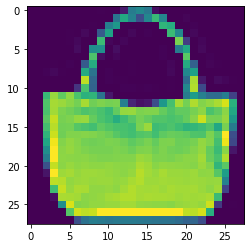

In [126]:
import numpy as np
import matplotlib.pyplot as plt
item_ID = 100
plt.imshow(training_images[item_ID])
print('Label ID:', training_labels[item_ID])

Each image has values with a range from 0 to 255. We will normalize them to between 0 and 1.

In [127]:
np.set_printoptions(linewidth=200)
print(training_images[item_ID])

[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167 159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0 174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0   0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2   0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2   0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0   4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0   0   1   0   0   0   0   5   

In [128]:
# normalize the value
training_images  = training_images / 255.0
testing_images = testing_images / 255.0

Next, we define the neural network model to learn the data. The first layer of the neuron is the image of a square shape that are converted to 1-dimensional data with `Flatten` function. Then the second layer is a hidden layer with 128 neurons. Lastly, make sure that the last layer of neurons has 10 units, the same number with all available labels.

In [129]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

We will train the model 5 epochs with some specific training configuration (optimizer, loss, metrics).

In [130]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3379 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.8917


After training, we want to see how accurate our model with the unseen data. We will call `model.evaluate` to know the value of the accuracy with the testing data. From the code below, the accuracy is about 0.86 or 86% accurate. It is lower than the accuracy we see from the training data (about 0.89 or 89%).

In [131]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8778


[0.3420328199863434, 0.8777999877929688]

The code below will classify all images in testing data with the probability of the item in each image for each of the 10 labels. 

In [132]:
classifications = model.predict(testing_images)

labels = {0: 'T-shirt/top',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'}

We will test our model with an image of a t-shirt with ID 121. The label ID for a t-shirt is 0. We can see below that the model correctly labels the image in the testing data.

The item in the image is: T-shirt/top


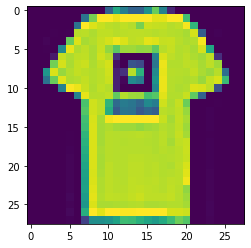

In [133]:
item_testing_ID = 121

# show the image and the testing label predicted by our trained model
plt.imshow(testing_images[item_testing_ID])
print('The item in the image is:', labels.get(testing_labels[item_testing_ID]))

The item classification comes from the output of the model (`classifications`) in a list of 10 numbers of the probability of whether an item can be classified into the corresponding label. From our example above, the item in the image is classified as the T-shirt (label ID: 0) with a probability of 99%.


In [134]:
p = classifications[item_testing_ID]

for i in range(10):
    print(f'{p[i]:.5%} \t {labels.get(i)}')

99.83797% 	 T-shirt/top
0.00000% 	 Trouser
0.00104% 	 Pullover
0.00028% 	 Dress
0.00000% 	 Coat
0.00000% 	 Sandal
0.16070% 	 Shirt
0.00000% 	 Sneaker
0.00000% 	 Bag
0.00000% 	 Ankle boot


We want to experiment with different epoch values and their effect on the value of loss in the training data. The impact of training with more epochs will be presented in the figure below. 

In [135]:
epochs = 100
history = model.fit(training_images, training_labels, epochs=epochs)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.8974
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2694 - accuracy: 0.9011
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2586 - accuracy: 0.9052
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2476 - accuracy: 0.9086
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2384 - accuracy: 0.9114
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2295 - accuracy: 0.9137
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2234 - accuracy: 0.9162
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2162 - accuracy: 0.9193
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2088 - accuracy: 0.9216
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

We can see that the value of loss decreases. However, the value of loss sometimes increases. For the value of accuracy (in the next figure), the same behavior also occurs. Sometimes the value increases and then decreases. This is an indication that the model might [overfit](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit) the training data.

Text(0, 0.5, 'loss')

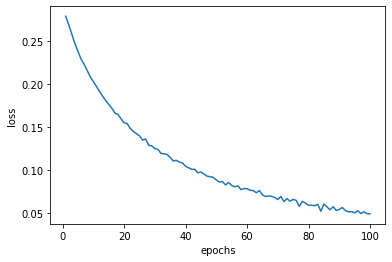

In [136]:
x_axis = [i for i in range(1,epochs+1)]
y_axis = history.history['loss']
plt.plot(x_axis, y_axis)
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

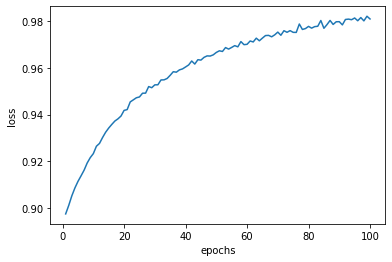

In [137]:
x_axis = [i for i in range(1,epochs+1)]
y_axis = history.history['accuracy']
plt.plot(x_axis, y_axis)
plt.xlabel('epochs')
plt.ylabel('loss')